## Final Project Submission

Please fill out:
* __Student name:__ Sharonda Pettiett-Warner
* __Student pace:__ part time - PT_0610
* __Scheduled project review date/time:__ Jan 28, 2020
* __Instructor name:__ Eli Thomas
* __Blog post URL:__ TBD

## Problem Statement

> __Question:__ Can we predict whether an individual’s income will be greater than $50,000 per year or not given their demographic and social economic attributes?


__Kernel from Kaggle__ 

Predicting if income exceeds $50,000 per year based on 1994 US Census Data.

__Abstract:__ 

For this assignment, we examine the Census Income dataset available at the UC
Irvine Machine Learning Repository. We aim to predict whether an individual’s income will be
greater than $50,000 per year based on several attributes from the census data.

## The Dataset

The US Adult Census dataset is a repository of 32,561 entries and 15 columns extracted from the 1994 US Census database.

Each entry contains the following information
about an individual:

    - age: the age of an individual
    - workclass: a general term to represent the employment status of an individual
        - Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov, Without­pay, Never­worked
    - fnlwgt: final weight. In other words, this is the number of people the census believes the entry represents.
    - education: the highest level of education achieved by an individual.
        - Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc, 9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool
    - education­num: the highest level of education achieved in numerical form
    - marital­status: marital status of an individual 
        - Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces Married­civ­spouse, Divorced, Never­married, Separated, Widowed,Married­spouse­absent, Married­AF­spouse.
    - occupation: the general type of occupation of an individual
        - Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,Armed­Forces
    - relationship: represents what this individual is relative to others. 
        - Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried
    - race: Descriptions of an individual’s race
        - White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black
    - sex: the biological sex of the individual
        - Male, Female
    - capital­gain: capital gains for an individual
    - capital­loss: capital loss for an individual
    - hours­per­week: the hours an individual has reported to work per week
    - native­country: country of origin for an individual
        - United­States, Cambodia, England, Puerto­Rico, Canada, Germany,Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,Trinadad&Tobago, Peru, Hong, Holand­Netherlands
    - the (label): whether or not an individual makes more than $50,000 annually, Values: (<=50k OR 50k)

# Begin Study

## Project Quote
> Torture the data, and it will confess to anything. — Ronald Coase

### Import Libraries

In [95]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import auc, classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Imputer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

#### Import Functions

In [2]:
# ./module_ml.py file contains the following function(s): 

# _print_metrics(labels, preds) - used to Print Performance Metrics
import module_ml as m_ml   

### Load Dataset

In [3]:
dataset = pd.read_csv('./income_evaluation.csv')
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset.shape

(32561, 15)

# EDA

## Data Mining

In [5]:
# Check column names for spaces
dataset.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
# Replace spaces with no spaces in column names
dataset.columns = dataset.columns.str.replace(' ', '')

In [7]:
dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_number',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

In [8]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_number',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
# Check for missing values
dataset.isna().any().any()

False

In [10]:
# Check for missing values
dataset.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_number    0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [11]:
# Check datatypes, # rows and columns, missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                 32561 non-null int64
workclass           32561 non-null object
fnlwgt              32561 non-null int64
education           32561 non-null object
education_number    32561 non-null int64
marital_status      32561 non-null object
occupation          32561 non-null object
relationship        32561 non-null object
race                32561 non-null object
sex                 32561 non-null object
capital_gain        32561 non-null int64
capital_loss        32561 non-null int64
hours_per_week      32561 non-null int64
native_country      32561 non-null object
income              32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# To view statistical properties of numerical variables:
dataset.describe()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# To view the statistical properties of character variables:
dataset.describe(include=['object'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [14]:
# Find numerical variables
numerical_vars = [var for var in dataset.columns if dataset[var].dtype=='int64']
print(f'There are {len(numerical_vars)} numerical variables.\n')
print(f'The numerical variables are : {numerical_vars}\n')

There are 6 numerical variables.

The numerical variables are : ['age', 'fnlwgt', 'education_number', 'capital_gain', 'capital_loss', 'hours_per_week']



In [15]:
# Check for erroreous values in numerical data values
for var in numerical_vars: 
    print(dataset[var].value_counts(normalize = True))

36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
33    0.026873
28    0.026627
30    0.026443
37    0.026351
25    0.025828
27    0.025644
32    0.025429
38    0.025398
39    0.025061
29    0.024969
41    0.024815
24    0.024508
40    0.024385
26    0.024109
42    0.023955
43    0.023648
22    0.023494
20    0.023126
46    0.022634
45    0.022542
44    0.022235
21    0.022112
19    0.021867
47    0.021744
50    0.018488
        ...   
60    0.009582
61    0.009213
62    0.007924
63    0.007064
64    0.006388
65    0.005467
67    0.004637
66    0.004607
68    0.003685
69    0.003317
70    0.002733
71    0.002211
72    0.002058
73    0.001966
74    0.001566
76    0.001413
75    0.001382
90    0.001321
77    0.000891
78    0.000706
80    0.000676
79    0.000676
81    0.000614
82    0.000369
84    0.000307
83    0.000184
85    0.000092
88    0.000092
87    0.000031
86    0.000031
Name: age, Length: 73, dtype: float64
164190     0.000399
203488     0.000399
123011 

In [16]:
# Find categorical variables
categorical_vars = [var for var in dataset.columns if dataset[var].dtype=='O']
print(f'There are {len(categorical_vars)} categorical variables.\n')
print(f'The categorical variables are : {categorical_vars}\n')

There are 9 categorical variables.

The categorical variables are : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']



In [17]:
# Check for erroreous values in categorical data values
for var in categorical_vars: 
    print(dataset[var].value_counts(normalize = True))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

In [18]:
dataset.loc[dataset['workclass'] == ' ?']

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K


#### Observations: EDA 
- Spaces in columns names, replaced with no spaces
- No missing values
- Following categorical columns contain the following '?' character: workclass, occupation and native_country which contain missing values.
- Many object data type columns, could be represented by categorical columns
- Dataset contains 9 character variables and 6 numerical variables.
- TARGET: Income is the target variable.

## Visualization

#### Plot pairwise relationships in a dataset

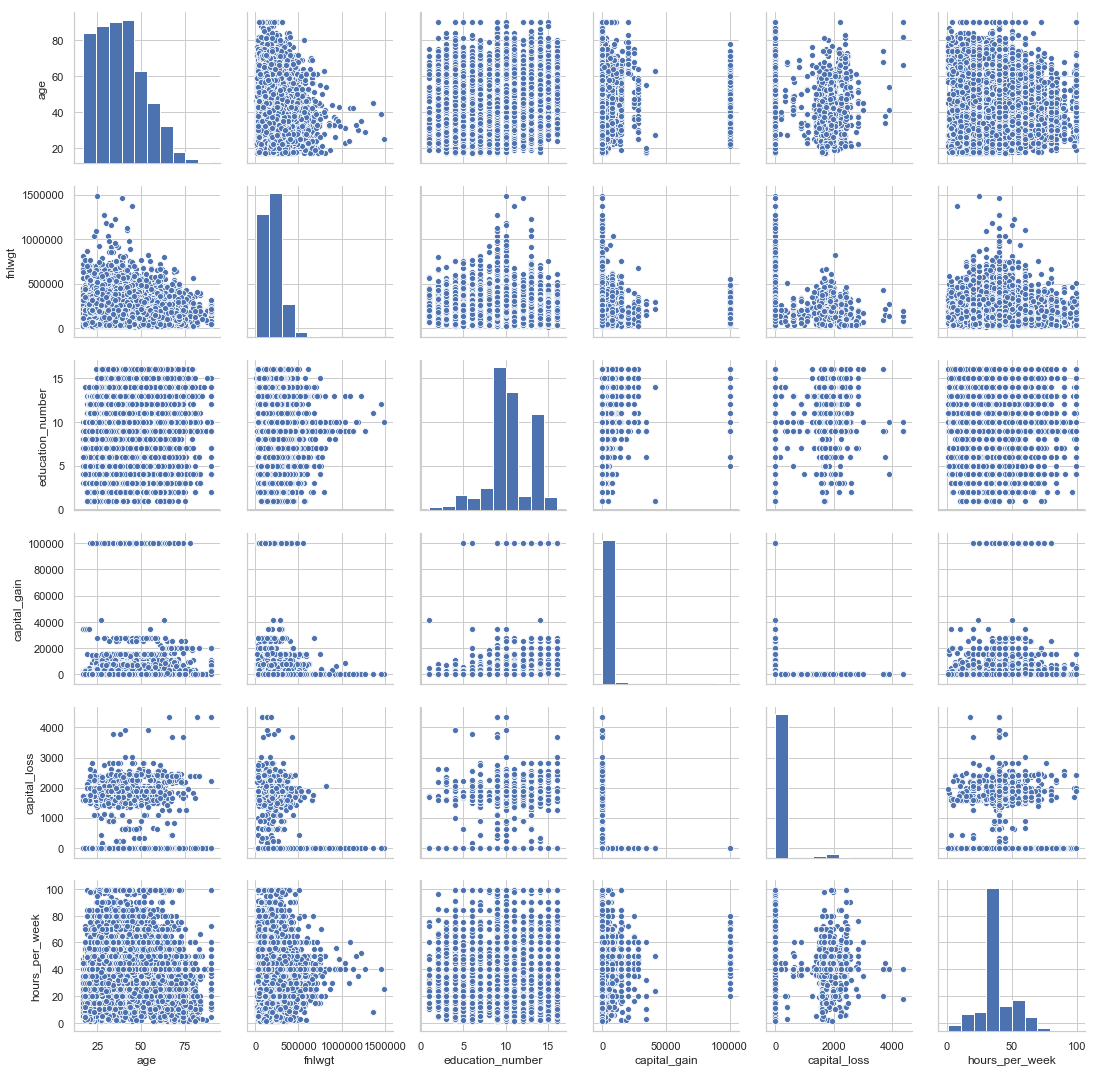

In [19]:
sns.pairplot(dataset);

#### Target Variable

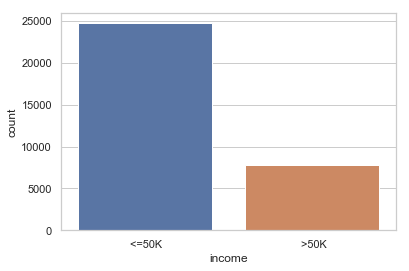

In [20]:
# Evaluate Target Values
sns.countplot(dataset['income']);

In [21]:
dataset['income'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

> Dataset contains a distribution of 24 % entries labeled with >50k and 76% entries labeled with <=50k.

#### Occupation Variable

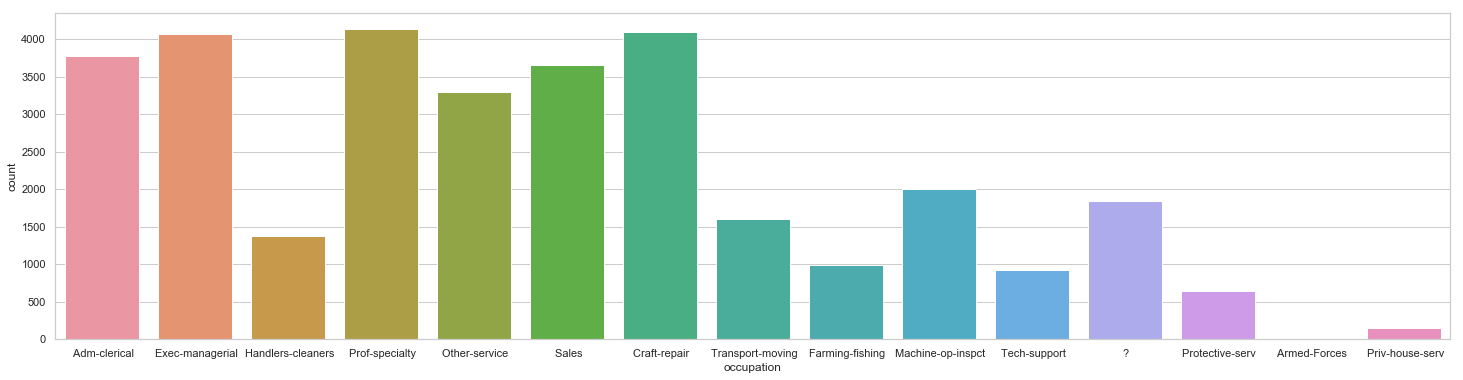

<Figure size 432x288 with 0 Axes>

In [22]:
# Occupation Distribution
fig = plt.figure(figsize=(25,6))
sns.countplot(dataset['occupation'], orient='h')
plt.show()

plt.savefig('./PPT_IMG/occupation_distribution')

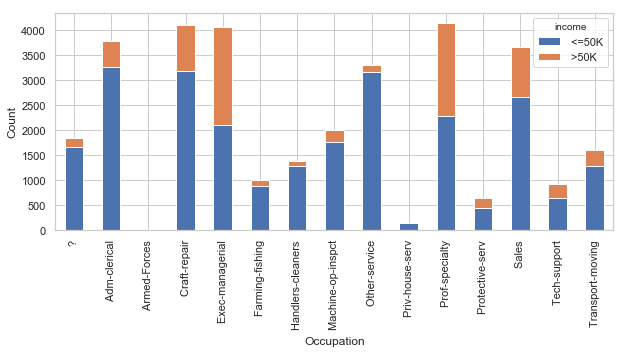

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot percentage of occupation per income class
df_occ_income = dataset.groupby(['occupation'])['income'].value_counts(normalize=False).unstack()
df_occ_income.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

plt.savefig('./PPT_IMG/occupation_per_income_class')

#### Age Variable

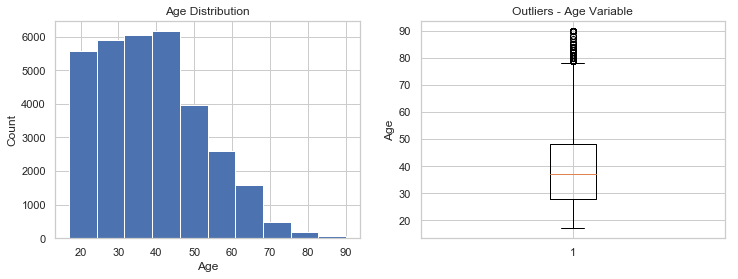

In [24]:
# Age Distribution

fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['age'])
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['age'])
ax2.set_title('Outliers - Age Variable')
ax2.set_ylabel('Age')

plt.savefig('./PPT_IMG/age_distribution')
plt.show()

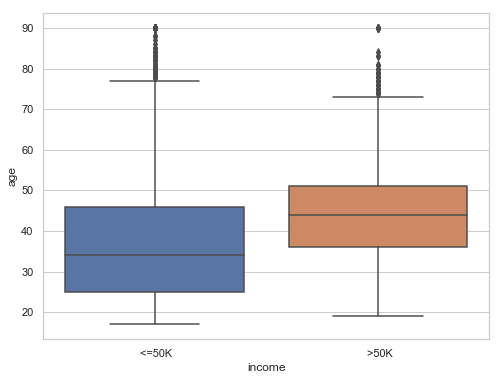

In [25]:
fig = plt.figure(figsize=(8,6)) 
sns.boxplot(x='income', y='age', data=dataset)
plt.show()

In [26]:
# Age Group vs Income
dataset.groupby(['income'])['age'].value_counts(normalize=False).unstack()

age,17,18,19,20,21,22,23,24,25,26,...,80,81,82,83,84,85,86,87,88,90
income,,,,,,,,,,,,,,,,,,,,,
<=50K,395.0,550.0,710.0,753.0,717.0,752.0,865.0,767.0,788.0,722.0,...,20.0,17.0,12.0,4.0,9.0,3.0,1.0,1.0,3.0,35.0
>50K,NaN,NaN,2.0,NaN,3.0,13.0,12.0,31.0,53.0,63.0,...,2.0,3.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,8.0


In [27]:
# Create Age Bins/Buckets in dataset
age_bins = np.array([10,20,30,40,50,60,70,80,90,100])
dataset["age_bucket"] = pd.cut(dataset['age'], age_bins)
dataset.head()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_bucket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"(30, 40]"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"(40, 50]"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"(30, 40]"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"(50, 60]"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"(20, 30]"


In [28]:
# Age Group vs Income
df_age_income = dataset.groupby(['income'])['age_bucket'].value_counts(normalize=False).unstack()
df_age_income


age_bucket,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]"
income,,,,,,,,
<=50K,2408,7482,6140,4328,2581,1335,361,85
>50K,2,680,2406,2655,1547,457,80,14


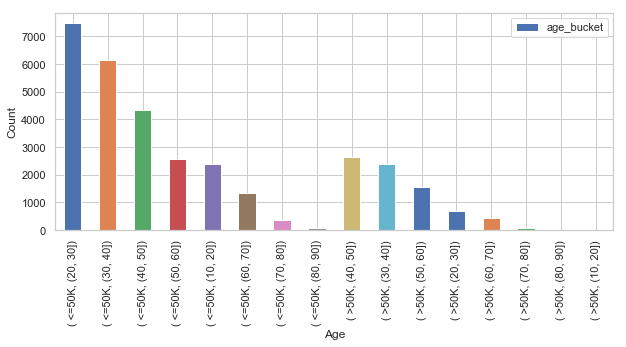

<Figure size 432x288 with 0 Axes>

In [29]:
# Plot percentage of age per income class
df_age_income = dataset.groupby(['income'])['age_bucket'].value_counts(normalize=False)
df_age_income.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.savefig('./PPT_IMG/age_per_income_class')

#### Education Variable

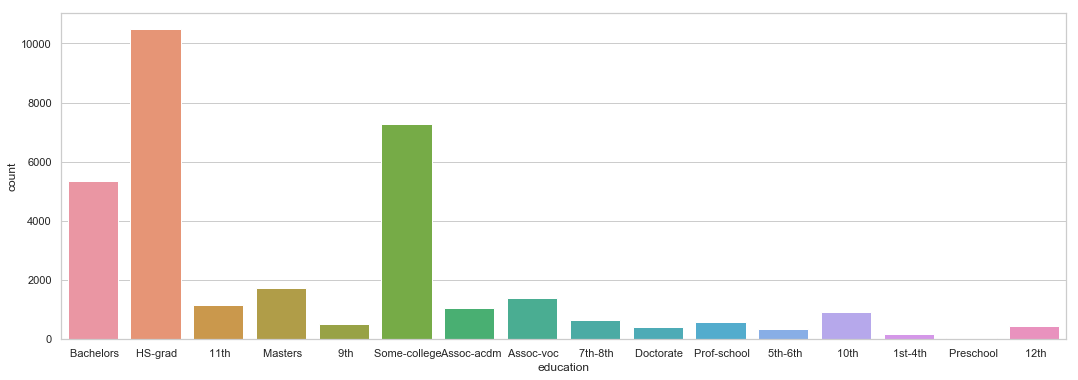

<Figure size 432x288 with 0 Axes>

In [30]:
# Highest Level Education Distribution

fig = plt.figure(figsize=(18,6))
sns.countplot(dataset['education'], )
plt.show()

plt.savefig('./PPT_IMG/education_distribution')

In [31]:
dataset['education'].value_counts(normalize=True)

 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

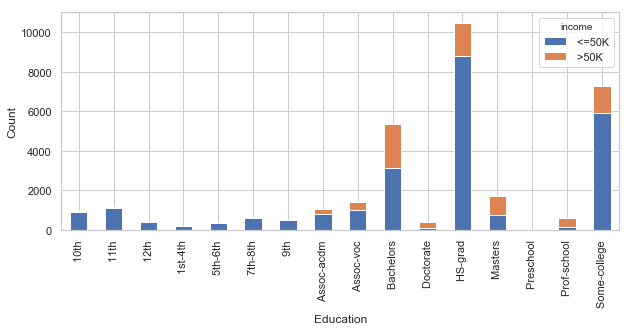

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot count of highest level Education per income class
df_edu_income = dataset.groupby(['education'])['income'].value_counts(normalize=False).unstack()
df_edu_income.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

plt.savefig('./PPT_IMG/education_per_income_class')

#### Gender Variable

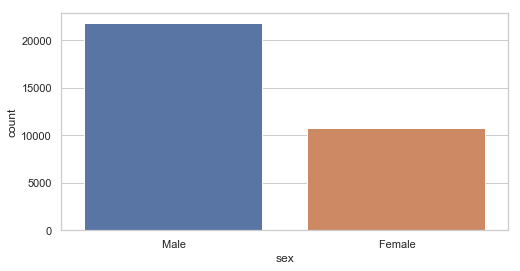

<Figure size 432x288 with 0 Axes>

In [33]:
# Gender Distribution
fig = plt.figure(figsize=(8,4))
sns.countplot(dataset['sex'])
plt.show()

plt.savefig('./PPT_IMG/gender_distribution')

In [34]:
dataset['sex'].value_counts(normalize=True)

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

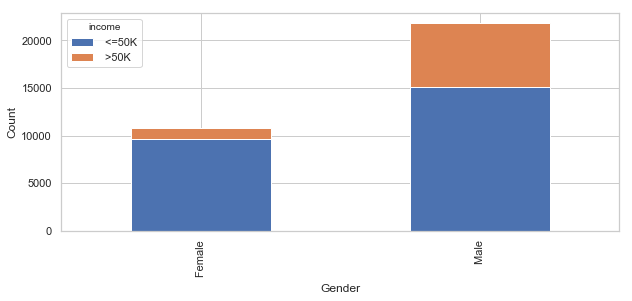

<Figure size 432x288 with 0 Axes>

In [35]:
# Plot count of gender per income class
df_gender_income = dataset.groupby(['sex'])['income'].value_counts(normalize=False).unstack()
df_gender_income.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.savefig('./PPT_IMG/gender_per_income_class')

#### Race Variable

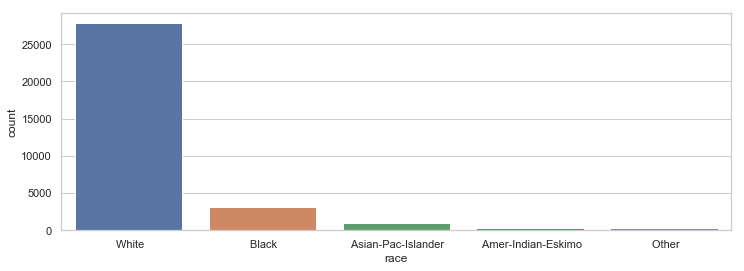

<Figure size 432x288 with 0 Axes>

In [36]:
# Race Distribution
fig = plt.figure(figsize=(12,4))
sns.countplot(dataset['race'])
plt.show()

plt.savefig('./PPT_IMG/race_distribution')

In [37]:
dataset['race'].value_counts(normalize=True)

 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64

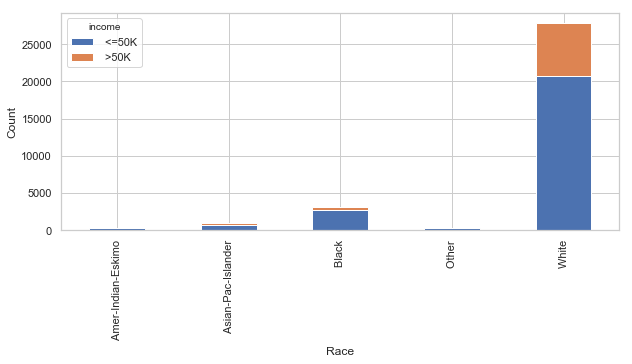

<Figure size 432x288 with 0 Axes>

In [38]:
# Plot count of race per income class
df_race_income = dataset.groupby(['race'])['income'].value_counts(normalize=False).unstack()
df_race_income.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

plt.savefig('./PPT_IMG/race_per_income_class')

#### Marital Status Variable

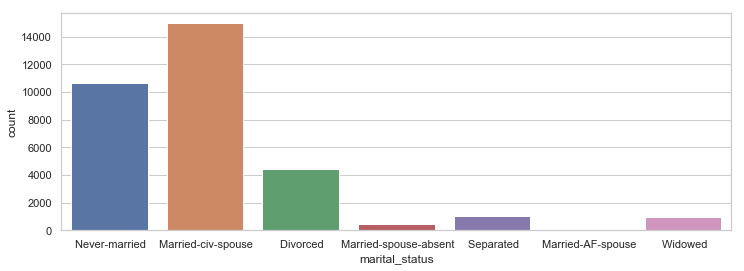

<Figure size 432x288 with 0 Axes>

In [39]:
# Marital Status Distribution
fig = plt.figure(figsize=(12,4))
sns.countplot(dataset['marital_status'])
plt.show()

plt.savefig('./PPT_IMG/marital_status_distribution')

In [40]:
dataset['marital_status'].value_counts(normalize=True)

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital_status, dtype: float64

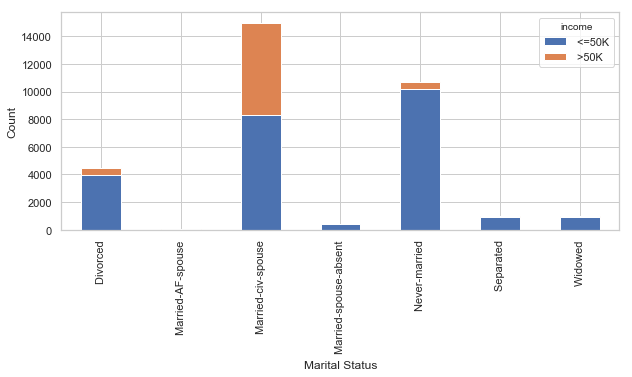

<Figure size 432x288 with 0 Axes>

In [41]:
# Plot count of marital status per income class
df_marital_income = dataset.groupby(['marital_status'])['income'].value_counts(normalize=False).unstack()
df_marital_income.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

plt.savefig('./PPT_IMG/marital_status_per_income_class')

#### Workclass Variable

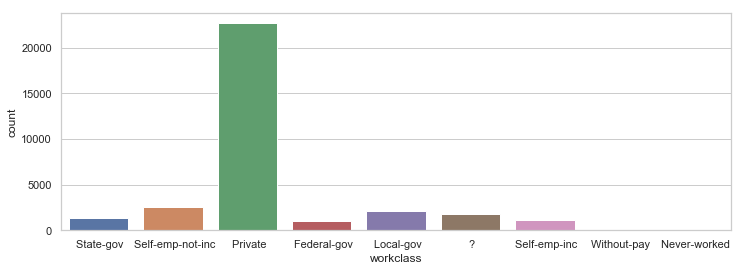

<Figure size 432x288 with 0 Axes>

In [42]:
# Workclass Distribution
fig = plt.figure(figsize=(12,4))
sns.countplot(dataset['workclass'])
plt.show()

plt.savefig('./PPT_IMG/workclass_distribution')

In [43]:
dataset['workclass'].value_counts(normalize=True)

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64

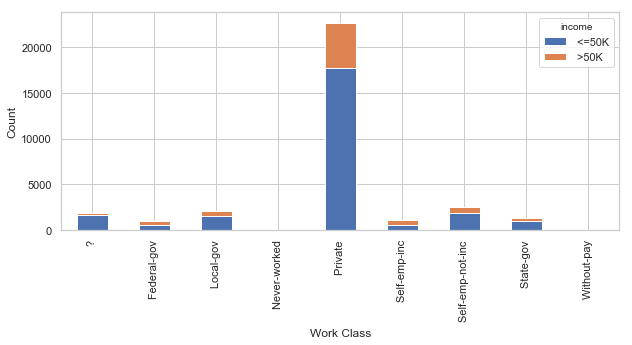

<Figure size 432x288 with 0 Axes>

In [44]:
# Plot count of workclass per income class
df_workclass_income = dataset.groupby(['workclass'])['income'].value_counts(normalize=False).unstack()
df_workclass_income.plot(kind='bar',stacked=True, legend=True,figsize=(10, 4))
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.show()

plt.savefig('./PPT_IMG/workclass_per_income_class')

#### Hours Per Week Variable

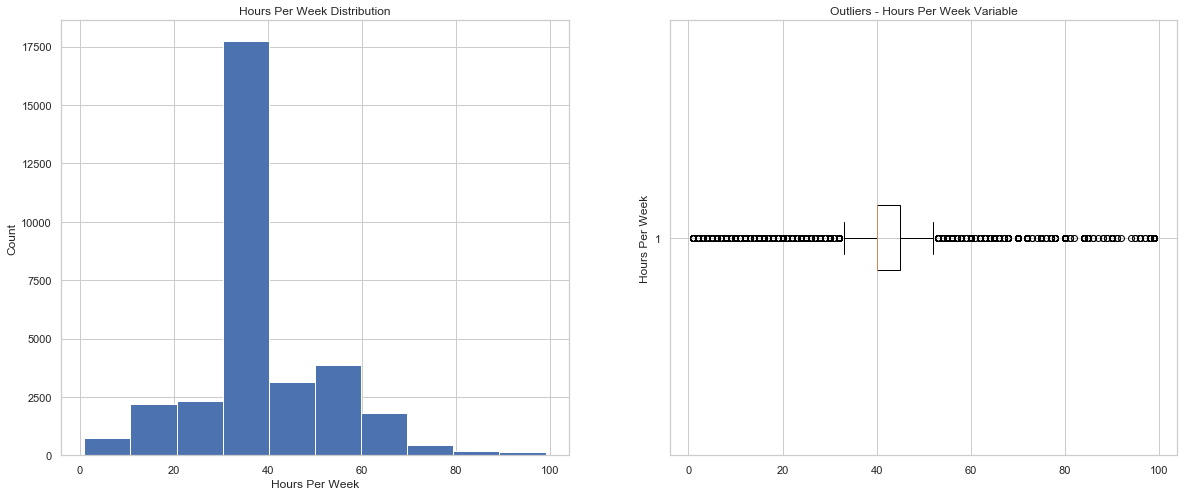

In [45]:
# Hours Per Week Distribution

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(dataset['hours_per_week'])
ax1.set_title('Hours Per Week Distribution')
ax1.set_xlabel('Hours Per Week')
ax1.set_ylabel('Count')


ax2 = plt.subplot(1,2,2)
ax2.boxplot(dataset['hours_per_week'], vert=False)
ax2.set_title('Outliers - Hours Per Week Variable')
ax2.set_ylabel('Hours Per Week')

plt.savefig('./PPT_IMG/hrs_per_wk_distribution')
plt.show()

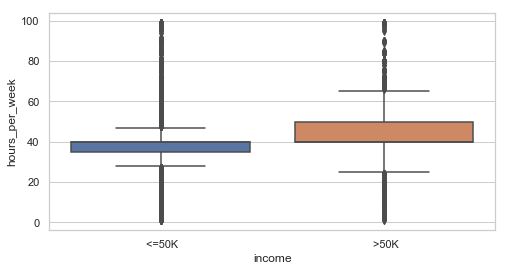

In [46]:
fig = plt.figure(figsize=(8,4)) 
sns.boxplot(x='income', y='hours_per_week', data=dataset)
plt.show()

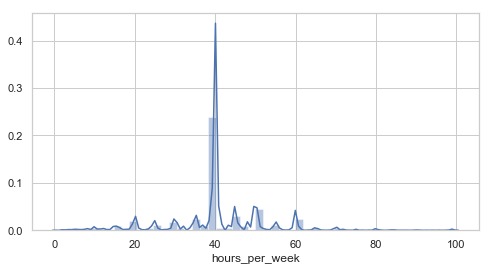

In [47]:
fig = plt.figure(figsize=(8,4)) 
sns.distplot(dataset['hours_per_week'])
plt.show()

#### Observations: Visualization 
- Unbalanced target values:  <=50K    0.75919 | >50K     0.24081
- Race values seem to be unbalanced - White    = 0.854274 (85%)

## Pandas Profiling

In [48]:
# !pip install pandas-profiling

In [49]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(dataset)
profile

In [50]:
profile = profile.to_file(output_file='Income Profile - ML.html')

#### Observations: Pandas Profiling 
- (Review Report Output)
- Phik Correlation report, show income, marital status and relationship with a .60 corrl.
- Reported Warnings:

    - Dataset has 24 (0.1%) duplicate rows	
    - capital-gain has 29849 (91.7%) zeros	
    - capital-loss has 31042 (95.3%) zeros

# Data Cleaning

In [51]:
df = dataset.copy()

In [52]:
df.shape

(32561, 16)

#### Drop pre-processing columns

In [53]:
# Drop pre-processing column
df = df.drop(['age_bucket'], axis=1)

#### Remove Duplicate Rows 

In [54]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates().reset_index(drop=True)
df.tail()

,age,workclass,fnlwgt,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32536,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [55]:
df.shape

# (32537, 15)

(32537, 15)

#### Observations: Data Cleaning 
- Remove duplicate rows from the dataset - Dataset has 24 duplicate rows: (0.1%)
- No missing values.

# Feature Engineering

#### Impute rows with erroneous data

In [56]:
# replace '?' values with `impute values for mode`  
df['occupation'].replace(' ?', np.nan, inplace=True)
df['workclass'].replace(' ?', np.nan, inplace=True)
df['native_country'].replace(' ?', np.nan, inplace=True)

In [57]:
occupation_mode=df['occupation'].mode()
workclass_mode = df['workclass'].mode()
native_country_mode = df['native_country'].mode()
display(occupation_mode, workclass_mode, native_country_mode )

0     Prof-specialty
dtype: object

0     Private
dtype: object

0     United-States
dtype: object

In [58]:
df['occupation']=df['occupation'].fillna(occupation_mode)
df['workclass']=df['workclass'].fillna(workclass_mode)
df['native_country']=df['native_country'].fillna(native_country_mode)

> __Action:__ FILL MISSING VALUES WITH TEST STATISTIC

#### One-hot Encoding

In [59]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Update columns names

In [60]:
# Replace spaces with no spaces in column names
df.columns = df.columns.str.replace(' ', '')

In [61]:
df.columns

Index(['age', 'fnlwgt', 'education_number', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishin

In [62]:
df.shape

(32537, 98)

#### Observations: Feature Engineering 
- Decision: DO NOT remove rows with '?' (unknown values); instead choose to impute missing categorical variables using 'mode':
    - df['occupation']
    - df['workclass']
    - df['native_country']
    - Number of rows that would be impacted from removal = __2,398 or 7.37%__.  
        __NOTE__: Dropping is only advised to be used if missing values are few (0.01–0.5% of our data) as a rule of thumb.

# Create Train, Test Splits

#### Create X,y variables

In [63]:
# Create X, y vars for further processing
y = df['income_>50K']
X = df.drop(['income_>50K'], axis=1)

In [64]:
X.tail()

,age,fnlwgt,education_number,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
32532,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32533,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32534,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32535,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32536,52,287927,9,15024,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [65]:
y.tail()

32532    0
32533    1
32534    0
32535    0
32536    1
Name: income_>50K, dtype: uint8

#### Create train_test_split

In [66]:
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size=0.30, random_state=42)

In [67]:
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape)

(22775, 97) (22775,) (9762, 97) (9762,)


# Create Baseline Model(s)

### Iterate through Classification Models

In [68]:
# Spot Check Algorithms

models = []
models.append(('GaussianNB', GaussianNB()))
models.append(('LogRegress', LogisticRegression()))#solver='liblinear', multi_class='ovr')))
models.append(('LinearDiscr', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClf', KNeighborsClassifier()))
models.append(('DecisionTreeClf', DecisionTreeClassifier()))
models.append(('RandomForestClf', RandomForestClassifier()))
models.append(('AdaBoostClf', AdaBoostClassifier()))
models.append(('GradBoostClf', GradientBoostingClassifier()))
models.append(('XGBClassifier', XGBClassifier()))
# models.append(('SVMClassifier', SVC(gamma='auto')))  # Accuracy Score (mean): 0.756055 (std): +/- 0.002317

# Evaluate each model 
results = []
names   = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') # Fit data
    results.append(cv_results)
    names.append(name)
    print(f'{name}\t Train Accuracy Score (mean): {round(cv_results.mean(),6)} (std): +/- {round(cv_results.std(),6)}')

GaussianNB	 Train Accuracy Score (mean): 0.795259 (std): +/- 0.008828
LogRegress	 Train Accuracy Score (mean): 0.797146 (std): +/- 0.006893
LinearDiscr	 Train Accuracy Score (mean): 0.840088 (std): +/- 0.005365
KNeighborsClf	 Train Accuracy Score (mean): 0.77462 (std): +/- 0.007582
DecisionTreeClf	 Train Accuracy Score (mean): 0.818222 (std): +/- 0.005741
RandomForestClf	 Train Accuracy Score (mean): 0.848517 (std): +/- 0.006625
AdaBoostClf	 Train Accuracy Score (mean): 0.857871 (std): +/- 0.003758
GradBoostClf	 Train Accuracy Score (mean): 0.865116 (std): +/- 0.004442
XGBClassifier	 Train Accuracy Score (mean): 0.863579 (std): +/- 0.005125


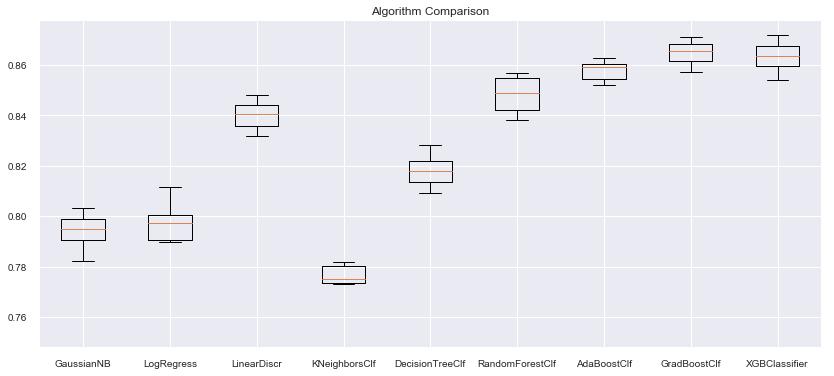

In [69]:
# Compare Algorithms
plt.figure(figsize=(14,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#### Observations: Baseline Models
- The best performing models:
    
    - __LinearDiscr__	     
    - __RandomForestClf__	  
    - __AdaBoostClf__	     
    - __GradBoostClf__	    
    - __XGBClassifier__	  

# Build Predictive Models for Selected Classifiers

- Selected classifiers to continue further analyis:

    - __LinearDiscr__	     
    - __RandomForestClf__	  
    - __AdaBoostClf__	     
    - __GradBoostClf__	    
    - __XGBClassifier__	     

## Analysis Model - 1 | Perform Scaling

> Update feature engineering to perform __scaling__ of the data in an effort to improve the model performance.

### StandardScaler()

In [70]:
# StandardScaler()
from sklearn.preprocessing import StandardScaler

pipe_linDisc = Pipeline([('scaler', StandardScaler()),
        ('clf', LinearDiscriminantAnalysis())])

pipe_rf = Pipeline([('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('scaler', StandardScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('scaler', StandardScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('scaler', StandardScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_linDisc, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LinearDiscr','RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]

# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_validation, y_validation),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

LinearDiscr	 Test Accuracy Score: 0.837738 	 Train Accuracy Score: 0.841844
RandomForestClf	 Test Accuracy Score: 0.845728 	 Train Accuracy Score: 0.987486
AdaBoostClf	 Test Accuracy Score: 0.861299 	 Train Accuracy Score: 0.860329
GradBoostClf	 Test Accuracy Score: 0.865499 	 Train Accuracy Score: 0.870165
XGBClassifier	 Test Accuracy Score: 0.864679 	 Train Accuracy Score: 0.866915


### MinMaxScaler()

In [71]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

pipe_linDisc = Pipeline([('mms', MinMaxScaler()),
        ('clf', LinearDiscriminantAnalysis())])

pipe_rf = Pipeline([('mms', MinMaxScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('mms', MinMaxScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('mms', MinMaxScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('mms', MinMaxScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_linDisc, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LinearDiscr','RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]

# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_validation, y_validation),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

LinearDiscr	 Test Accuracy Score: 0.837738 	 Train Accuracy Score: 0.841844
RandomForestClf	 Test Accuracy Score: 0.845626 	 Train Accuracy Score: 0.986564
AdaBoostClf	 Test Accuracy Score: 0.861299 	 Train Accuracy Score: 0.860329
GradBoostClf	 Test Accuracy Score: 0.865396 	 Train Accuracy Score: 0.870033
XGBClassifier	 Test Accuracy Score: 0.864679 	 Train Accuracy Score: 0.866915


### RobustScaler()

In [72]:
# RobustScaler()
from sklearn.preprocessing import RobustScaler

pipe_linDisc = Pipeline([('rs', RobustScaler()),
        ('clf', LinearDiscriminantAnalysis())])

pipe_rf = Pipeline([('rs', RobustScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('rs', RobustScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('rs', RobustScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('rs', RobustScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_linDisc, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LinearDiscr','RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]

# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_validation, y_validation),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

LinearDiscr	 Test Accuracy Score: 0.837738 	 Train Accuracy Score: 0.841844
RandomForestClf	 Test Accuracy Score: 0.845523 	 Train Accuracy Score: 0.987311
AdaBoostClf	 Test Accuracy Score: 0.861299 	 Train Accuracy Score: 0.860329
GradBoostClf	 Test Accuracy Score: 0.866831 	 Train Accuracy Score: 0.869989
XGBClassifier	 Test Accuracy Score: 0.864679 	 Train Accuracy Score: 0.866915


#### Observations: Model - 1 | Perform Scaling 
- All models had a performance improvement from the baseline accuracy scores with all scaling algorithms.
- The best performing scaling algorithm is __RobustScaler()__, except for GradBoostClf:
   
    - __LinearDiscr__	     
    - __RandomForestClf__	  
    - __AdaBoostClf__	     
    - __XGBClassifier__	  
- GradBoostClf best performing scaler is __MinMaxScaler()__:
    - __GradBoostClf__	    
- Overfitting with the following model(s): 
    - __RandomForestClf__	 __Test Accuracy Score: 0.851362 	 Train Accuracy Score: 0.986345__
        - Consider: Pruning by tuning the classifier hyperparameters.

## Analysis Model - 2 | Parameter Tuning  Model(s)

> Use __Pipeline__ and  __GridSearchCV__ to prune/tune classification model(s) in an effort to improve the model performance.

#### RandomForestClf()

In [73]:
from sklearn.pipeline import Pipeline

# Random Forest

pipe_rf = Pipeline([('rs', RobustScaler()),
        ('clf', RandomForestClassifier(random_state = 42))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [10,100,120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6,7,8],  
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=0, return_train_score = True) # verbose=2

# Fit using grid search
model = gs_rf.fit(X_train, y_train)
target_names = y_validation.unique().astype(str)
y_pred = model.predict(X_validation)

print(f'Classification Report:\n {classification_report(y_validation, y_pred, target_names=target_names)}\n')
# Best params
print(f'Model Parameters:\n {gs_rf.best_params_}\n')
# Best est and Train Accuracy
print(f'Model Accuracy Scores:')
print(f'RandomForestClf \t Test Accuracy Score: {round(model.score(X_validation, y_validation),6)} \t Train Accuracy Score: {round(model.score(X_train, y_train),6)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      7405
           1       0.80      0.52      0.63      2357

   micro avg       0.85      0.85      0.85      9762
   macro avg       0.83      0.74      0.77      9762
weighted avg       0.85      0.85      0.84      9762


Model Parameters:
 {'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__n_estimators': 100}

Model Accuracy Scores:
RandomForestClf 	 Test Accuracy Score: 0.853001 	 Train Accuracy Score: 0.85708


#### Observations: Model -2 | Tune Classification Model(s)
- Parameter tuning improved performance marginally.
- Improved RandomForest Model Test Accuracy to __0.853__ from 0.851362.
- Removed the issue of overfitting by pruning the model:
    - Pruning by tuning the classifier hyperparameters: 
        - {'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__n_estimators': 100}
        - RandomForestClf 	 __Test Accuracy Score: 0.853001  |	 Train Accuracy Score: 0.85708__

## Analysis Model -3 | Identify Most Predictive Features

### Using RFECV

In [74]:
from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier(random_state=42)
selector = RFECV(estimator, step=1, cv=10, scoring = 'accuracy')
selector = selector.fit(X_train, y_train)
display(selector.support_) # List of boolean values
display(selector.ranking_)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False])

array([ 1,  1,  1,  1,  1,  1,  1, 43,  1,  1,  1,  1, 35,  1,  3, 19,  4,
        1,  1,  1,  1,  1,  1,  1,  1, 39,  1,  1, 10,  1,  1,  1,  1,  1,
       41,  1,  1,  1,  1,  1,  1, 33,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 11, 14,  7, 29, 26, 25,  2, 17,  1, 23,
       32, 31, 44, 40, 37, 22,  5, 15, 24,  1,  9,  8, 34,  1, 21, 42, 28,
        1, 12, 27, 16, 36,  6, 13, 38, 30,  1, 18, 20])

In [75]:
# List of X Train Columns
# X_train.columns
X_train.shape

(22775, 97)

#### Most Predictive Features

In [76]:
# Most Predictive Features
rfecv_mask = selector.get_support()  # List of boolean values
best_features = []

for each_bool, feat in zip(rfecv_mask, X_train.columns):
    if each_bool == True:
        best_features.append(feat)
print(f'Optimal number of predictive features: {selector.n_features_}')
print(f'Number of most predictive features: {len(best_features)}')
print(f'Most Predictive Features: \n {best_features}')

Optimal number of predictive features: 54
Number of most predictive features: 54
Most Predictive Features: 
 ['age', 'fnlwgt', 'education_number', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_11th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital_status_Married-civ-spouse', 'marital_status_Married-spouse-absent', 'marital_status_Never-married', 'marital_status_Separated', 'marital_status_Widowed', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-

Optimal number of features : 73


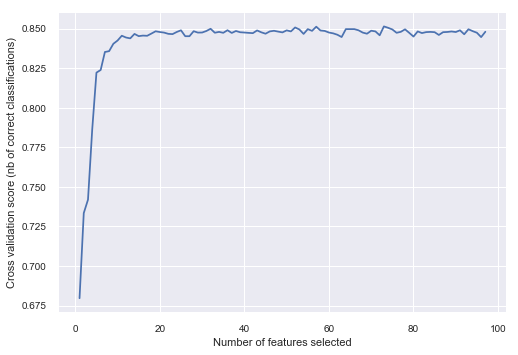

In [77]:
# Diagram of Optimal number of features_
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Least Predictive Features

In [78]:
# Least Predictive Features:
rfecv_mask = selector.get_support()  # List of boolean values
worst_features = []

for each_bool, feat in zip(rfecv_mask, X_train.columns):
    if each_bool == False:
        worst_features.append(feat)

print(f'Number of least predictive features: {len(worst_features)}')
print(f'Least Predictive Features: \n {worst_features}')

least_import_feat = worst_features
#least_import_feat

Number of least predictive features: 43
Least Predictive Features: 
 ['workclass_Never-worked', 'workclass_Without-pay', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_Preschool', 'marital_status_Married-AF-spouse', 'occupation_Armed-Forces', 'occupation_Priv-house-serv', 'native_country_China', 'native_country_Columbia', 'native_country_Cuba', 'native_country_Dominican-Republic', 'native_country_Ecuador', 'native_country_El-Salvador', 'native_country_England', 'native_country_France', 'native_country_Greece', 'native_country_Guatemala', 'native_country_Haiti', 'native_country_Holand-Netherlands', 'native_country_Honduras', 'native_country_Hong', 'native_country_Hungary', 'native_country_India', 'native_country_Iran', 'native_country_Ireland', 'native_country_Jamaica', 'native_country_Japan', 'native_country_Laos', 'native_country_Nicaragua', 'native_country_Outlying-US(Guam-USVI-etc)', 'native_country_Peru', 'native_country_Poland', 'native_country_Portugal', '

In [79]:
# Drop the least important feature(s) from X_train and X_test
X_train = X_train.drop(least_import_feat, axis=1)
X_validation = X_validation.drop(least_import_feat, axis=1)

In [80]:
print(X_train.shape, X_validation.shape )

(22775, 54) (9762, 54)


### Re-run Algorithm(s) - Determine Best Performing Model

In [81]:
import importlib
importlib.reload(m_ml)

<module 'module_ml' from 'C:\\Data_Science\\FlatIron_DS_Bootcamp\\Projects\\Mod5_ML\\dsc-mod-5-project-online-ds-pt-061019\\module_ml.py'>

LinearDiscr	 Test Accuracy Score: 0.837943 	 Train Accuracy Score: 0.841317

Null Accuracy:
0    0.758554
Name: income_>50K, dtype: float64

cohen_kappa_score: 
 0.5231015370020909 

matthews_corrcoef: 
 0.5291467687936203 

roc_auc_score: 
 0.7426390624046577 

True y_values: [0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
Pred y_values: [0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
LABELS: 0= <=50K | 1= >50K 

# Postive Observations (=1): 2357 
# Negative Observations(=0): 7405
% of Postive Observations: 24.0%

Confusion Matrix: n= 9762 
 [[6864  541]
 [1041 1316]]

Confusion Matrix Metrics: TP = 1316 | TN = 6864 | FP = 541 | FN = 1041 



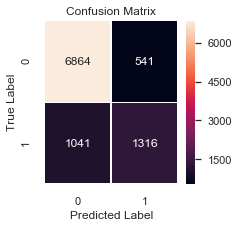

Classification Report:
               precision    recall  f1-score   support

   <=50K (0)       0.87      0.93      0.90      7405
    >50K (1)       0.71      0.56      0.62      2357

   micro avg       0.84      0.84      0.84      9762
   macro avg       0.79      0.74      0.76      9762
weighted avg       0.83      0.84      0.83      9762


Precision Score: 0.7086698976844372
Recall Score: 0.5583368689011455
Accuracy Score: 0.8379430444581029
F1 Score: 0.6245847176079734
Misclassification Rate: 0.16205695554189714
____________________________________________________________________________________________________ 

RandomForestClf	 Test Accuracy Score: 0.856484 	 Train Accuracy Score: 0.859846

Null Accuracy:
0    0.758554
Name: income_>50K, dtype: float64

cohen_kappa_score: 
 0.5600387623507221 

matthews_corrcoef: 
 0.5765672973997369 

roc_auc_score: 
 0.7493652736672723 

True y_values: [0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
Pred y_values: [0 0 0 0 0 0 0 0 0 

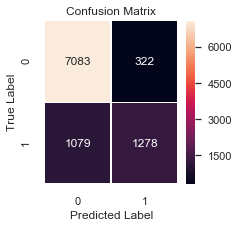

Classification Report:
               precision    recall  f1-score   support

   <=50K (0)       0.87      0.96      0.91      7405
    >50K (1)       0.80      0.54      0.65      2357

   micro avg       0.86      0.86      0.86      9762
   macro avg       0.83      0.75      0.78      9762
weighted avg       0.85      0.86      0.85      9762


Precision Score: 0.79875
Recall Score: 0.5422146796775562
Accuracy Score: 0.8564843269821758
F1 Score: 0.6459438968915845
Misclassification Rate: 0.1435156730178242
____________________________________________________________________________________________________ 

AdaBoostClf	 Test Accuracy Score: 0.862733 	 Train Accuracy Score: 0.861207

Null Accuracy:
0    0.758554
Name: income_>50K, dtype: float64

cohen_kappa_score: 
 0.5980581296386577 

matthews_corrcoef: 
 0.6040394839401759 

roc_auc_score: 
 0.7787912340072255 

True y_values: [0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
Pred y_values: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 

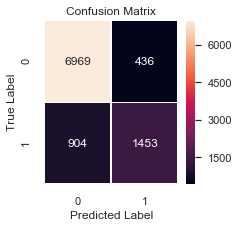

Classification Report:
               precision    recall  f1-score   support

   <=50K (0)       0.89      0.94      0.91      7405
    >50K (1)       0.77      0.62      0.68      2357

   micro avg       0.86      0.86      0.86      9762
   macro avg       0.83      0.78      0.80      9762
weighted avg       0.86      0.86      0.86      9762


Precision Score: 0.7691900476442562
Recall Score: 0.6164616037335596
Accuracy Score: 0.8627330465068633
F1 Score: 0.6844088553933113
Misclassification Rate: 0.13726695349313667
____________________________________________________________________________________________________ 

GradBoostClf	 Test Accuracy Score: 0.865704 	 Train Accuracy Score: 0.87034

Null Accuracy:
0    0.758554
Name: income_>50K, dtype: float64

cohen_kappa_score: 
 0.6022531807824927 

matthews_corrcoef: 
 0.6105333068752056 

roc_auc_score: 
 0.7775679036713662 

True y_values: [0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
Pred y_values: [0 0 0 0 0 0 0 0 0 1 0 

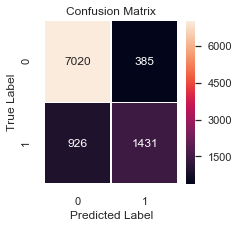

Classification Report:
               precision    recall  f1-score   support

   <=50K (0)       0.88      0.95      0.91      7405
    >50K (1)       0.79      0.61      0.69      2357

   micro avg       0.87      0.87      0.87      9762
   macro avg       0.84      0.78      0.80      9762
weighted avg       0.86      0.87      0.86      9762


Precision Score: 0.7879955947136564
Recall Score: 0.6071277047093764
Accuracy Score: 0.8657037492317148
F1 Score: 0.6858375269590223
Misclassification Rate: 0.13429625076828522
____________________________________________________________________________________________________ 

XGBClassifier	 Test Accuracy Score: 0.864577 	 Train Accuracy Score: 0.86775

Null Accuracy:
0    0.758554
Name: income_>50K, dtype: float64

cohen_kappa_score: 
 0.5961917370862756 

matthews_corrcoef: 
 0.6059099898744006 

roc_auc_score: 
 0.7729206349297294 

True y_values: [0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
Pred y_values: [0 0 0 0 0 0 0 0 0 1 0

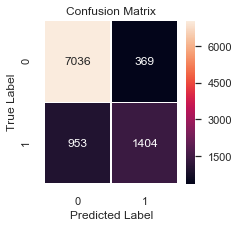

Classification Report:
               precision    recall  f1-score   support

   <=50K (0)       0.88      0.95      0.91      7405
    >50K (1)       0.79      0.60      0.68      2357

   micro avg       0.86      0.86      0.86      9762
   macro avg       0.84      0.77      0.80      9762
weighted avg       0.86      0.86      0.86      9762


Precision Score: 0.7918781725888325
Recall Score: 0.5956724649978786
Accuracy Score: 0.8645769309567711
F1 Score: 0.6799031476997579
Misclassification Rate: 0.13542306904322887
____________________________________________________________________________________________________ 

Test Accuracy Scores for the Classifiers: 
 [('LinearDiscr', 0.837943), ('RandomForestClf', 0.856484), ('AdaBoostClf', 0.862733), ('GradBoostClf', 0.865704), ('XGBClassifier', 0.864577)] 



In [108]:
# Re-run models to determine the best performing model

pipe_linDisc = Pipeline([('rs', RobustScaler()),
        ('clf', LinearDiscriminantAnalysis())])

pipe_rf = Pipeline([('rs', RobustScaler()),
        ('clf', RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=100))])

pipe_ab = Pipeline([('rs', RobustScaler()),
        ('clf', AdaBoostClassifier(random_state = 42))])

pipe_gb = Pipeline([('mms', MinMaxScaler()),
        ('clf', GradientBoostingClassifier(random_state = 42))])

pipe_xgb = Pipeline([('rs', RobustScaler()),
        ('clf', XGBClassifier(random_state = 42))])

# List of pipelines, List of pipeline names
pipelines = [pipe_linDisc, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LinearDiscr','RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]
scoring_results = []

# Loop to fit each of the pipelines in the named list
for index, pipe in enumerate(pipelines):
    #print(pipe)
    pipe.fit(X_train, y_train)
    
    # Fit using grid search
    model = pipe.fit(X_train, y_train)
    target_names = ['<=50K (0)', '>50K (1)'] #y_validation.unique().astype(str)
    y_pred = model.predict(X_validation)
    
    # Compare Test and Train Accuracy Scores
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(pipe.score(X_validation, y_validation),6)} \t Train Accuracy Score: {round(pipe.score(X_train, y_train),6)}\n')
    scoring_results.append(round(pipe.score(X_validation, y_validation),6))
    
    # Null Accuracy
    y_validation.value_counts()/len(y_validation)
    print(f'Null Accuracy:\n{y_validation.value_counts().head(1)/len(y_validation)}\n')
    
    # cohen_kappa_score
    print(f'cohen_kappa_score: \n {cohen_kappa_score(y_validation, y_pred)} \n')
    
    # matthews_corrcoef
    print(f'matthews_corrcoef: \n {matthews_corrcoef(y_validation, y_pred)} \n')
    
    # roc_auc_score
    print(f'roc_auc_score: \n {roc_auc_score(y_validation, y_pred)} \n')
    
    # Compare True and Predicted Response Values
    print(f'True y_values: {y_validation.values[0:25]}')
    print(f'Pred y_values: {y_pred[0:25]}')
    print(f'LABELS: 0= <=50K | 1= >50K \n')
    
    # Number of Observations
    print(f'# Postive Observations (=1): {sum(y_validation.values)} ')
    print(f'# Negative Observations(=0): {len(y_validation.values) - sum(y_validation.values)}')
    print(f'% of Postive Observations: {round(sum(y_validation.values) / len(y_validation.values),2) *100}%\n')
    
    # Confusion Matrix
    cm = confusion_matrix(y_validation, y_pred)
    print(f'Confusion Matrix: n= {len(y_pred)} \n {cm}\n')
    TP = cm[1,1]  # True Positives
    TN = cm[0,0]  # True Negatives
    FP = cm[0,1]  # False Positves - Type I Errors
    FN = cm[1,0]  # False Negatives - Type II Errors
    print(f'Confusion Matrix Metrics: TP = {TP} | TN = {TN} | FP = {FP} | FN = {FN} \n')
    
    f, ax = plt.subplots(figsize =(3,3))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    print(f'Classification Report:\n {classification_report(y_validation, y_pred, target_names=target_names)}\n')
    m_ml.print_metrics(y_validation, y_pred)
    print(f'____________________________________________________________________________________________________ \n')

final_scoring_results = list(zip(pipeline_names, scoring_results))
print(f'Test Accuracy Scores for the Classifiers: \n {final_scoring_results} \n')


#### Observations: Determine Best Performing Model
> __GradBoostClf__ model worked the best out of all of our models giving the highest accuracy score for Test Accuracy Score: 0.865704 and Train Accuracy Score: 0.87034.

> __GradBoostClf__  highest micro avg    is   0.87 for precision.

### Using feature_importances_

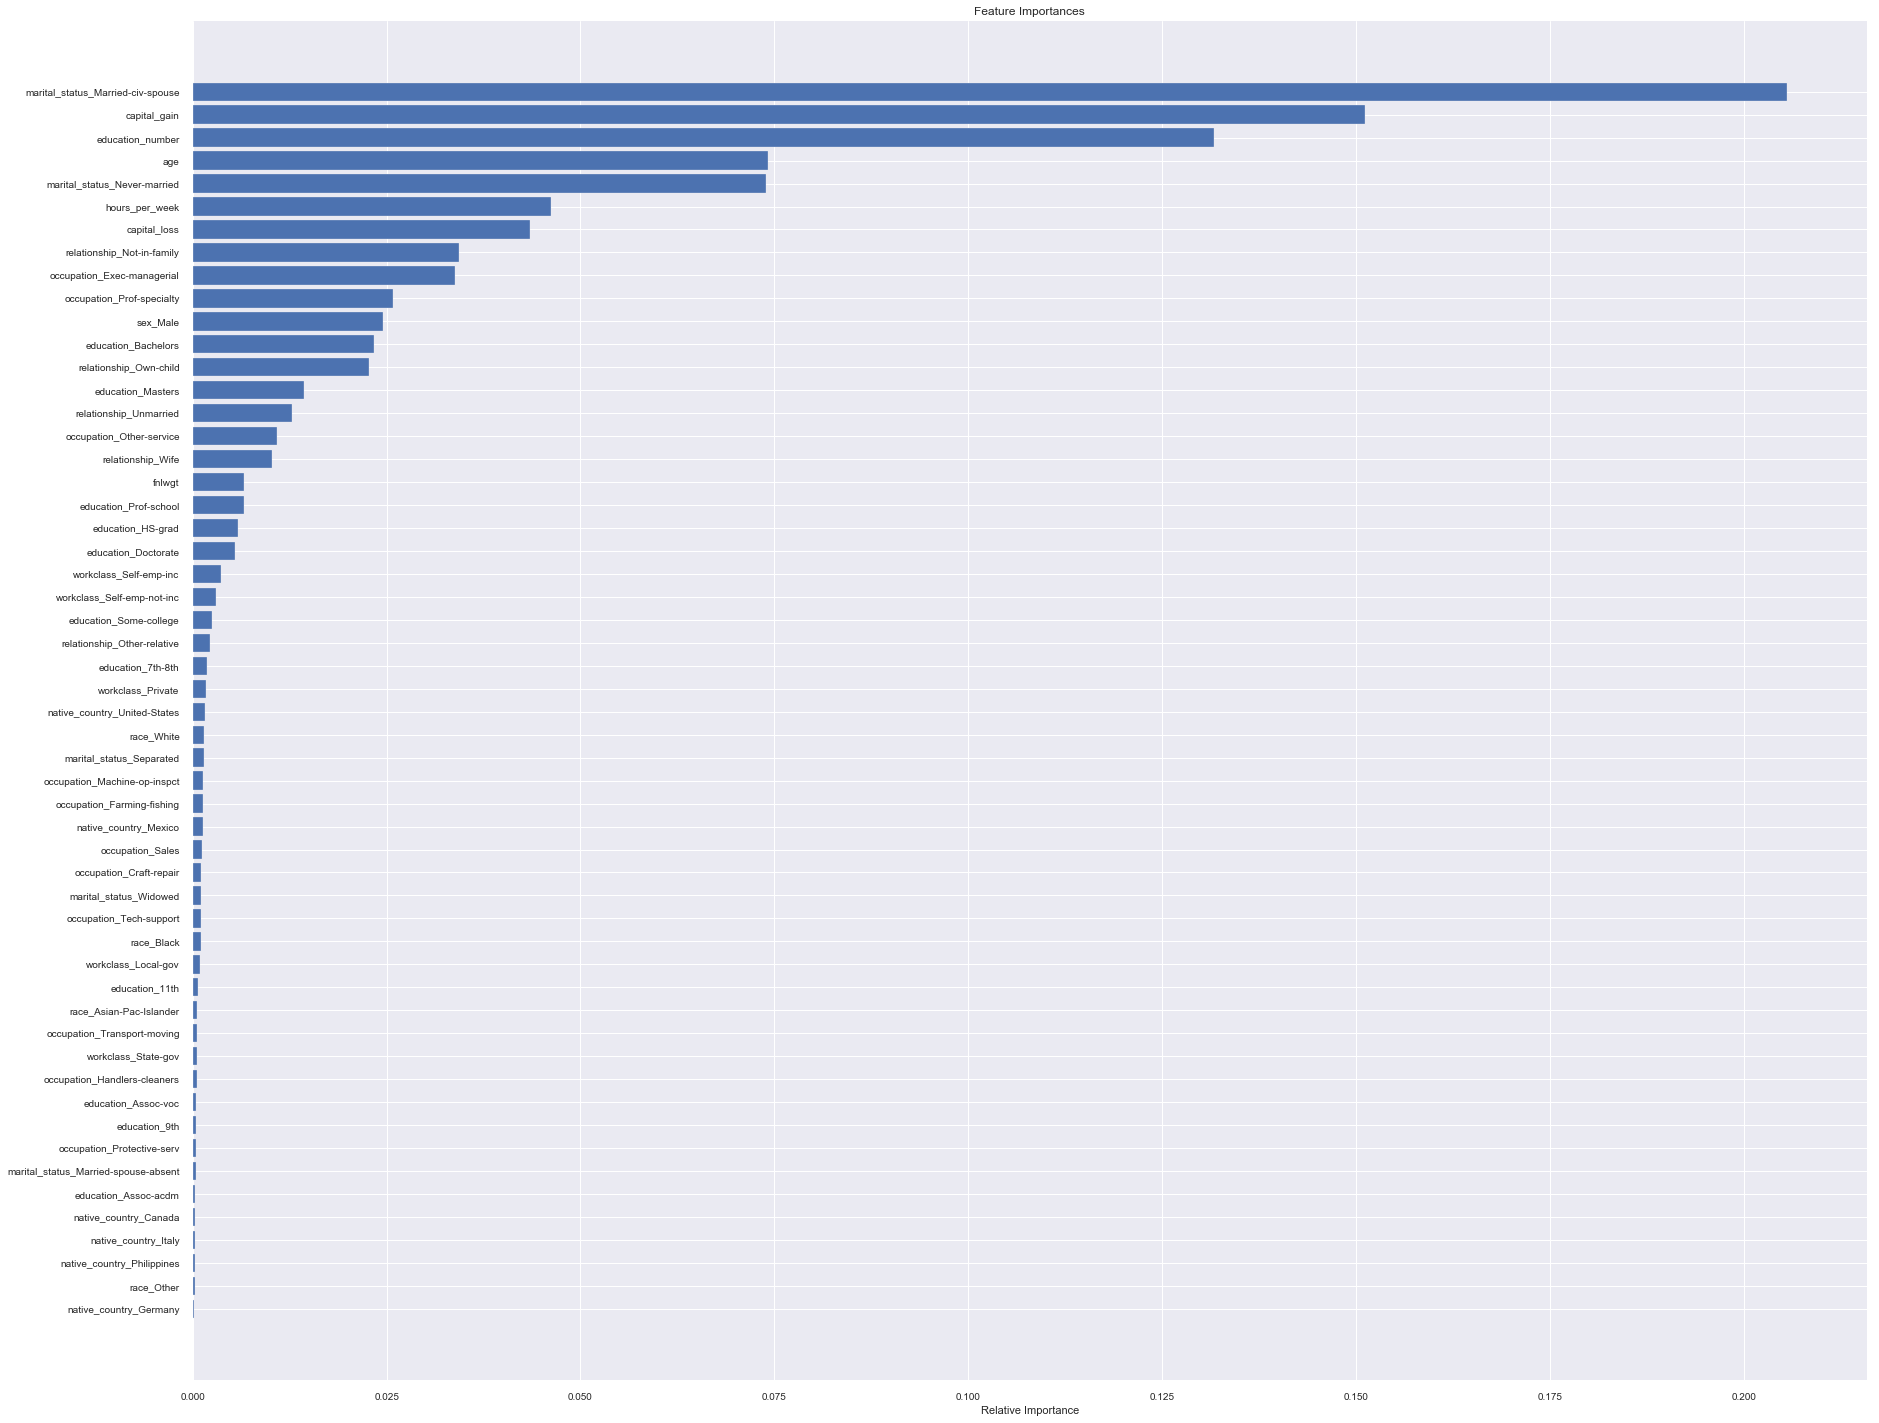

In [83]:
# Determines the most Predictive Features
clf = RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=100, random_state=42)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_validation)
features = X_train.columns

# Graph Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)
#print(indices)
plt.figure(figsize=(30, 25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


In [84]:
# View the feature scores

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

marital_status_Married-civ-spouse       0.205590
capital_gain                            0.151219
education_number                        0.131670
age                                     0.074188
marital_status_Never-married            0.073914
hours_per_week                          0.046259
capital_loss                            0.043436
relationship_Not-in-family              0.034322
occupation_Exec-managerial              0.033868
occupation_Prof-specialty               0.025768
sex_Male                                0.024499
education_Bachelors                     0.023412
relationship_Own-child                  0.022769
education_Masters                       0.014416
relationship_Unmarried                  0.012862
occupation_Other-service                0.010916
relationship_Wife                       0.010285
fnlwgt                                  0.006623
education_Prof-school                   0.006570
education_HS-grad                       0.005824
education_Doctorate 

#### Observations: Model -3 | Identify Most Predictive Features
From our analysis, we concluded that the most useful features for prediction were the following features (Top 10):

- marital_status_Married-civ-spouse 0.205590
- capital_gain 0.151219
- education_number 0.131670
- age 0.074188
- marital_status_Never-married 0.073914
- hours_per_week 0.046259
- capital_loss 0.043436
- relationship_Not-in-family 0.034322
- occupation_Exec-managerial 0.033868
- occupation_Prof-specialty 0.025768
- sex_Male 0.024499

# Conclusions

####  Best Performance Model

__GradientBoostingClassifier__	 

__Test Accuracy Score: 0.865704 	 Train Accuracy Score: 0.87034__

__Confusion Matrix:__

n= 9762 

 [[7020  385]
 
 [ 926 1431]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      7405
           1       0.79      0.61      0.69      2357

   micro avg       0.87      0.87      0.87      9762
   
   macro avg       0.84      0.78      0.80      9762
   
weighted avg       0.86      0.87      0.86      9762


- Precision Score: __0.7879955947136564__, Tells us the ratio of individuals correctly classified as having income > 50K.
- Recall Score: __0.6071277047093764__, Tells us the ratio of individuals classified as having income <=50K, when the income was actually > 50K.
- Accuracy Score: __0.8657037492317148__, Tells us the ratio of individuals correctly classified as having income > 50K and <=50K.
- F1 Score: __0.6858375269590223__, Tells us the average of precision and recall. 

> __GradBoostClf__ model worked the best out of all of our models giving the "highest" Test Accuracy Score __0.8657__ 

> Precision - micro avg is the "highest" __0.87__ 

> Increased training score from Train Accuracy Score (mean): __0.86516__ to Train Accuracy Score: __0.87034__

#### Summary of Results

This classification study evaluated the following __(9)__ alogrithms to predict the binary
value of the target label to determine whether or not an individual makes more that $50,000:
- GaussianNB	 
- LogRegress	 
- LinearDiscr	 
- KNeighborsClf	 
- DecisionTreeClf	 
- RandomForestClf	 
- AdaBoostClf	 
- GradBoostClf	 
- XGBClassifier	 

- __GradBoostClf__	  model worked the best out of all of our models giving the highest accuracy score for Test Accuracy Score: 0.865704 and Train Accuracy Score: 0.87034.

- __KNeighborsClf__ model was the least successful model with a basline  score for Train Accuracy Score (mean): 0.77462 (std): +/- 0.007582.

From our analysis, we concluded that the most useful features for prediction were the following features (Top 10): 

- marital_status_Married-civ-spouse       0.205590
- capital_gain                            0.151219
- education_number                        0.131670
- age                                     0.074188
- marital_status_Never-married            0.073914
- hours_per_week                          0.046259
- capital_loss                            0.043436
- relationship_Not-in-family              0.034322
- occupation_Exec-managerial              0.033868
- occupation_Prof-specialty               0.025768
- sex_Male                                0.024499

__Key Areas:__ ‘martial status’, ‘age’, ‘education’, ‘hours per week’, ‘occupation’, and ‘sex’.

#### Classifier Error Rate Matrix

In [85]:
# Classifier Error Rate Matrix
df_error_rate_matrix = pd.DataFrame(final_scoring_results, columns=['Classifier','Final Test Score'])
df_error_rate_matrix['Test Error Rate (Pct)'] = (1 - df_error_rate_matrix['Final Test Score']) * 100 
df_error_rate_matrix.sort_values('Test Error Rate (Pct)')

,Classifier,Final Test Score,Test Error Rate (Pct)
3,GradBoostClf,0.865704,13.4296
4,XGBClassifier,0.864577,13.5423
2,AdaBoostClf,0.862733,13.7267
1,RandomForestClf,0.857714,14.2286
0,LinearDiscr,0.837943,16.2057


> __GradBoostClf__  | has the lowest percent prediction error when evaluating against the test data set:	__13.4296%__

# Future Work

- Consider, further evaluation to address the following:

    - Approx. 75% of the data are that of individuals <= $50,000 which may attributed to high bias in the dataset. The lack of unequal distribution may suggest that we consider balancing this attribute in our prediction model, by using techiques such as, SMOTE.
    - The number of samples from individuals identifying as ‘White’ was severely disproportionate to even the sum of all of the rest of the samples in the data set.  The lack of unequal distribution may suggest that we consider not utilizing this attribute in our prediction model.
    - Omitting the rows with unknown values for attributes vs. imputing these rows.
    - Removal of several features: ‘fnlwgt’, ‘relationships’, and ‘capitalGains/Loss’. Some of these features seem to be not useful for our analysis or had too much bad data, such as: zero values and unknown/domain-specific values.  Here is where domain kowledge would have been beneficial.
        - eg. capital-gain has 29849 (91.7%) zeros, capital-loss has 31042 (95.3%) zeros
        - fnlwgt, this data point requires more domain knowledge to determine its impact in feature importance selection.


# Definitions

#### Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:

__True Positives (TP)__– True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

__True Negatives (TN)__ – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

__False Positives (FP)__ – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

__False Negatives (FN)__ – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

# End Study